In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wrangle import prep_pola, wrangle_pola

import tabula

import os
import requests
import pandas as pd

In [2]:
df = wrangle_pola()
df.head(20)

,num_at_anchor,num_at_berth,departed,avg_days_at_berth,avg_days_anchor_berth
date,,,,,
2015-03-17,15.0,16.0,5.0,4.00,9.40
2015-03-18,12.0,16.0,3.0,5.30,6.00
2015-03-19,13.0,17.0,5.0,5.60,12.20
2015-03-20,10.0,16.0,5.0,2.40,3.80
2015-03-23,8.0,15.0,2.0,4.00,15.50
2015-03-24,8.0,15.0,2.0,4.50,10.50
2015-03-25,8.0,16.0,4.0,5.00,6.75
2015-03-26,8.0,15.0,7.0,4.85,7.42
2015-03-27,7.0,12.0,1.0,5.00,9.00


In [15]:
df.iloc[97]

num_at_anchor               0.00
num_at_berth                8.00
departed                    6.00
avg_days_at_berth           2.66
avg_days_anchor_berth       2.66
year                     2015.00
month                       8.00
day                         4.00
backlog                     0.00
Name: 2015-08-04 00:00:00, dtype: float64

In [3]:
df['year'] = pd.DatetimeIndex(df.index).year
df['month'] = pd.DatetimeIndex(df.index).month
df['day'] = pd.DatetimeIndex(df.index).day

In [4]:
df['backlog'] = df.avg_days_anchor_berth - df.avg_days_at_berth
df.head()

,num_at_anchor,num_at_berth,departed,avg_days_at_berth,avg_days_anchor_berth,year,month,day,backlog
date,,,,,,,,,
2015-03-17,15.0,16.0,5.0,4.0,9.4,2015,3,17,5.4
2015-03-18,12.0,16.0,3.0,5.3,6.0,2015,3,18,0.7
2015-03-19,13.0,17.0,5.0,5.6,12.2,2015,3,19,6.6
2015-03-20,10.0,16.0,5.0,2.4,3.8,2015,3,20,1.4
2015-03-23,8.0,15.0,2.0,4.0,15.5,2015,3,23,11.5


In [5]:
df.sample(20)

,num_at_anchor,num_at_berth,departed,avg_days_at_berth,avg_days_anchor_berth,year,month,day,backlog
date,,,,,,,,,
2017-01-24,0.0,9.0,4.0,2.25,2.25,2017,1,24,0.0
2016-01-26,0.0,9.0,2.0,1.50,1.50,2016,1,26,0.0
2015-03-19,13.0,17.0,5.0,5.60,12.20,2015,3,19,6.6
2017-02-10,0.0,13.0,4.0,1.25,1.25,2017,2,10,0.0
2016-10-14,0.0,13.0,4.0,2.75,2.75,2016,10,14,0.0
2018-05-09,0.0,10.0,0.0,0.00,0.00,2018,5,9,0.0
2018-07-25,0.0,13.0,2.0,2.00,2.00,2018,7,25,0.0
2016-12-08,1.0,12.0,2.0,2.00,2.00,2016,12,8,0.0
2016-02-26,0.0,11.0,3.0,2.00,2.00,2016,2,26,0.0


In [6]:
train = df.iloc[:round(len(df)*.7)]
val = df.iloc[round(len(df)*.7):round(len(df)*.85)]
test = df.iloc[round(len(df)*.85):]

In [7]:
train.tail()

,num_at_anchor,num_at_berth,departed,avg_days_at_berth,avg_days_anchor_berth,year,month,day,backlog
date,,,,,,,,,
2017-11-06,0.0,8.0,1.0,2.00,2.00,2017,11,6,0.0
2017-11-07,0.0,9.0,3.0,2.66,2.66,2017,11,7,0.0
2017-11-08,0.0,11.0,2.0,5.50,5.50,2017,11,8,0.0
2017-11-09,0.0,13.0,3.0,1.33,1.33,2017,11,9,0.0
2017-11-13,0.0,7.0,3.0,3.66,3.66,2017,11,13,0.0


In [8]:
y = train.num_at_berth
y.head()

date
2015-03-17    16.0
2015-03-18    16.0
2015-03-19    17.0
2015-03-20    16.0
2015-03-23    15.0
Name: num_at_berth, dtype: float64

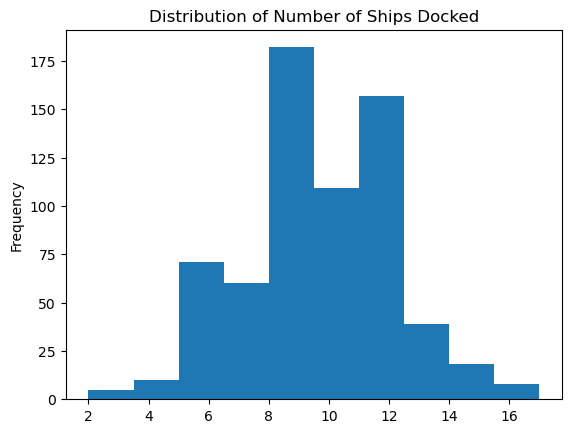

In [11]:
train.num_at_berth.plot.hist()
plt.title('Distribution of Number of Ships Docked')
plt.show()

In [16]:
train['weekday'] = train.index.day_name()
train['day_num'] = train.index.day_of_week

In [20]:
train.sample(20)

,num_at_anchor,num_at_berth,departed,avg_days_at_berth,avg_days_anchor_berth,year,month,day,backlog,weekday,day_num
date,,,,,,,,,,,
2015-11-10,0.0,7.0,3.0,1.60,1.60,2015,11,10,0.0,Tuesday,1
2015-06-15,0.0,6.0,3.0,2.66,2.66,2015,6,15,0.0,Monday,0
2017-04-21,0.0,9.0,3.0,2.00,2.00,2017,4,21,0.0,Friday,4
2016-07-12,0.0,8.0,2.0,1.50,1.50,2016,7,12,0.0,Tuesday,1
2017-06-15,0.0,9.0,4.0,2.50,2.50,2017,6,15,0.0,Thursday,3
2016-06-17,1.0,12.0,6.0,2.16,2.16,2016,6,17,0.0,Friday,4
2017-03-29,0.0,11.0,4.0,2.25,2.25,2017,3,29,0.0,Wednesday,2
2015-04-27,1.0,11.0,4.0,2.50,2.50,2015,4,27,0.0,Monday,0
2016-06-08,0.0,10.0,1.0,2.00,2.00,2016,6,8,0.0,Wednesday,2


In [17]:
train['num_at_berth'].mean()

9.41578148710167

#### Findings

Port of LA has 25 docks and an average of 9.5 are occupied on a given day. Only 7 of those 25 are dedicated "container terminals" for loading and unloading cargo containers, the rest are for other purposes, including ship maintenance and passenger loading/unloading. Container ships are the most common type of ship and all docks for this purpose are likely filled much of the time. Additional docks are likely filled with bulk, tanker, or passenger ships, or ships undergoing repairs. 

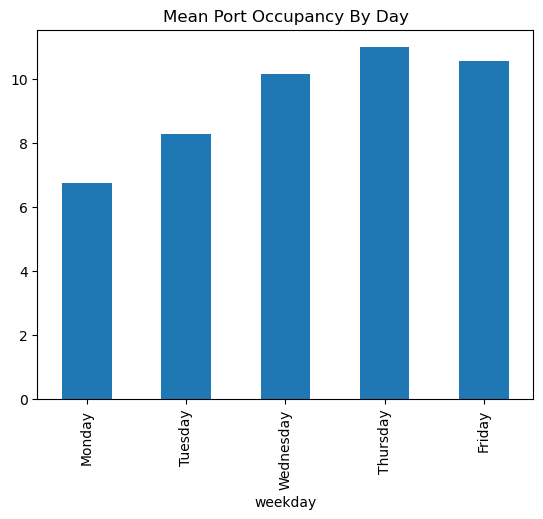

In [25]:
train.groupby('weekday').mean().sort_values('day_num').num_at_berth.plot.bar()

plt.title('Mean Port Occupancy By Day')
plt.show()

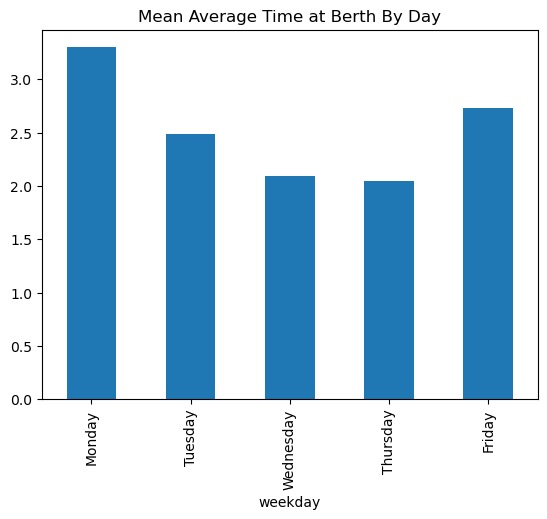

In [27]:
train.groupby('weekday').mean().sort_values('day_num').avg_days_at_berth.plot.bar()

plt.title('Mean Average Time at Berth By Day')
plt.show()

In [26]:
train['avg_days_at_berth'].mean()

2.5115326251896812

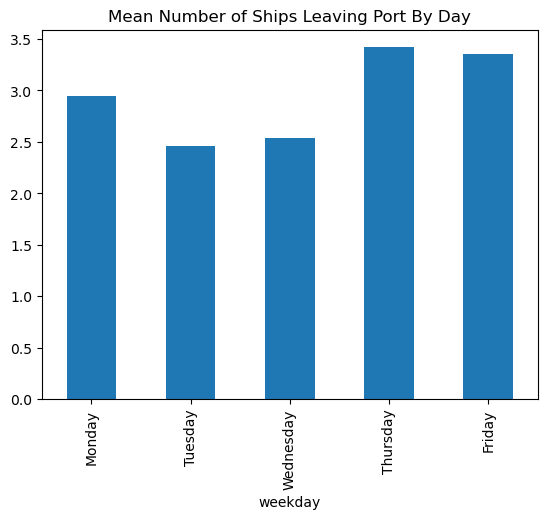

In [29]:
train.groupby('weekday').mean().sort_values('day_num').departed.plot.bar()

plt.title('Mean Number of Ships Leaving Port By Day')
plt.show()

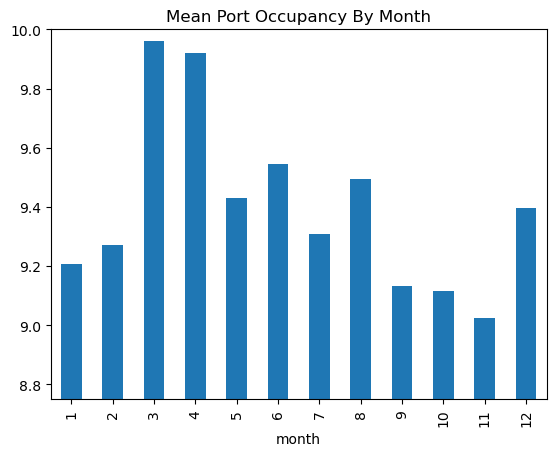

In [34]:
train.groupby('month').mean().sort_values('month').num_at_berth.plot.bar()

plt.title('Mean Port Occupancy By Month')
plt.ylim(8.75, 10)
plt.show()

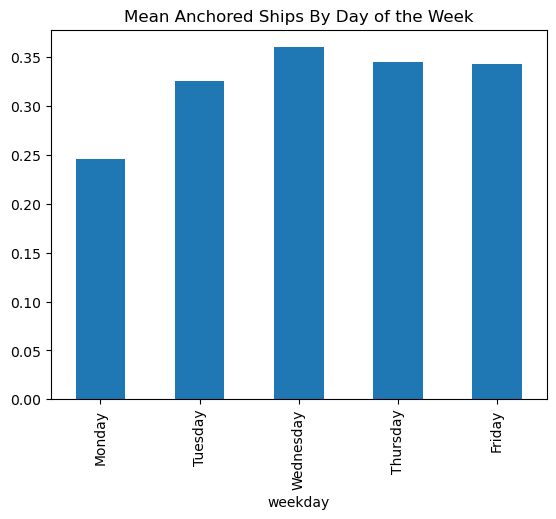

In [39]:
train.groupby('weekday').mean().sort_values('day_num').num_at_anchor.plot.bar()

plt.title('Mean Anchored Ships By Day of the Week')

plt.show()

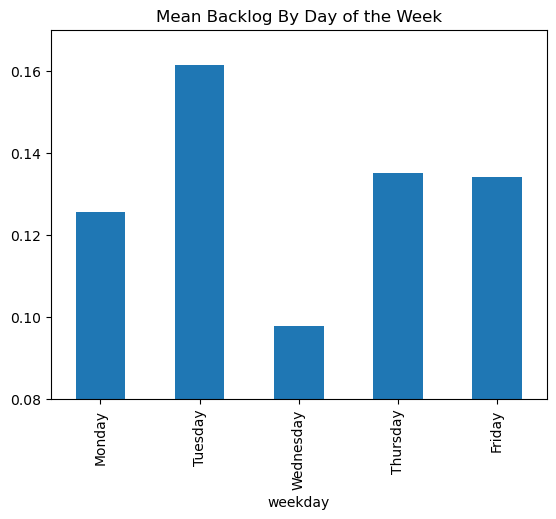

In [41]:
train.groupby('weekday').mean().sort_values('day_num').backlog.plot.bar()

plt.title('Mean Backlog By Day of the Week')
plt.ylim(.08, .17)
plt.show()

#### Notes

Backlog is at a minimum on Wednesday but Wednesday also has the lowest mean backlog. This may be due to increased effort at the end of the week to make ships ready for departure at the end of the week. This is reflected in that the highest average departure rate is on Thursday.

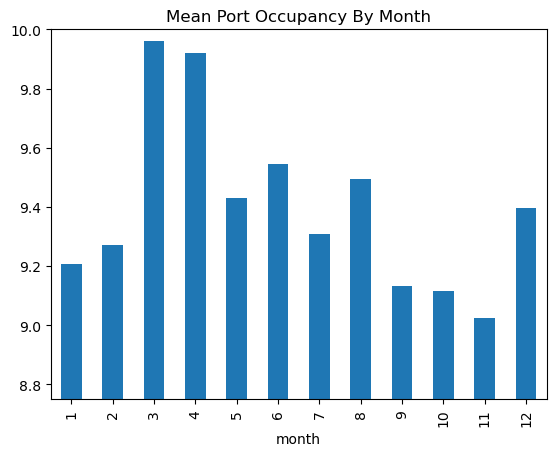

In [42]:
train.groupby('month').mean().sort_values('month').num_at_berth.plot.bar()

plt.title('Mean Port Occupancy By Month')
plt.ylim(8.75, 10)
plt.show()

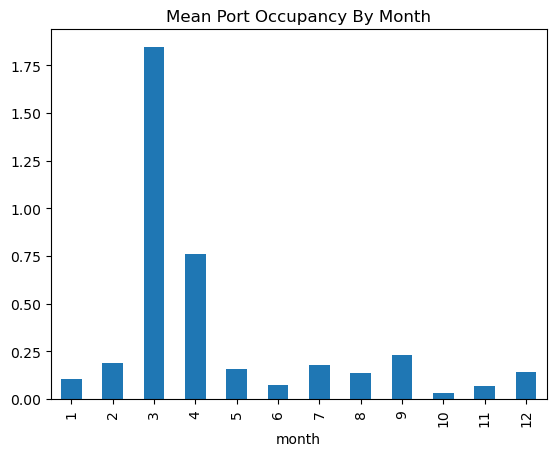

In [43]:
train.groupby('month').mean().sort_values('month').num_at_anchor.plot.bar()

plt.title('Mean Ships at Anchor By Month')

plt.show()

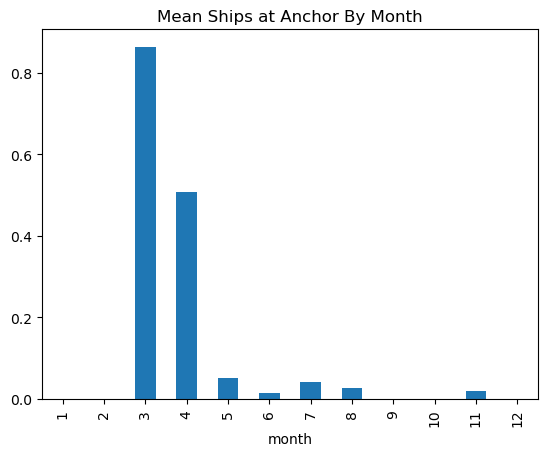

In [44]:
train.groupby('month').mean().sort_values('month').backlog.plot.bar()

plt.title('Mean Ships at Anchor By Month')

plt.show()

In [45]:
train.head(20)

,num_at_anchor,num_at_berth,departed,avg_days_at_berth,avg_days_anchor_berth,year,month,day,backlog,weekday,day_num
date,,,,,,,,,,,
2015-03-17,15.0,16.0,5.0,4.00,9.40,2015,3,17,5.40,Tuesday,1
2015-03-18,12.0,16.0,3.0,5.30,6.00,2015,3,18,0.70,Wednesday,2
2015-03-19,13.0,17.0,5.0,5.60,12.20,2015,3,19,6.60,Thursday,3
2015-03-20,10.0,16.0,5.0,2.40,3.80,2015,3,20,1.40,Friday,4
2015-03-23,8.0,15.0,2.0,4.00,15.50,2015,3,23,11.50,Monday,0
2015-03-24,8.0,15.0,2.0,4.50,10.50,2015,3,24,6.00,Tuesday,1
2015-03-25,8.0,16.0,4.0,5.00,6.75,2015,3,25,1.75,Wednesday,2
2015-03-26,8.0,15.0,7.0,4.85,7.42,2015,3,26,2.57,Thursday,3
2015-03-27,7.0,12.0,1.0,5.00,9.00,2015,3,27,4.00,Friday,4


#### Notes

2015  saw a dock workers strike on the West Coast, pushing shipping to other ports in the US. This resulted in additional backlog and anchored ships, typically an anomoly. 